## Observations and Insights

 * Capomulin regimen was the most successful in reducing tumor size over time.
 * Metastatic sites across all mice were least observered under the Capomulin Regimen
 * There is strong coorelation between weight of mice and avg tumor size.
 * Infubinol had one outlier and had the least amount of specimens able to complete the 45 day study

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress


# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

#print(mouse_metadata.head())
#print(study_results.head())


# Combine the data into a single dataset

In [2]:
merged = pd.merge(mouse_metadata, study_results, on="Mouse ID")

#merged.head()

## 1.Summary statistics
summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [3]:
merged.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "std","var","sem"])\
.rename(columns = {'mean' : 'Mean (vol mm3)', 'median':'Median (vol mm3)', 'std':'Standard Deviaion (vol mm3)',\
'var' : 'Variance (vol mm3)', 'sem' : 'Standard Error'})\


,Mean (vol mm3),Median (vol mm3),Standard Deviaion (vol mm3),Variance (vol mm3),Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.322552,50.854632,6.507770,42.351070,0.512884
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


## 2. Bar plots
Bar plot showing number of data points for each treatment regimen using pandas and pylot methods

## 2a Pandas Method

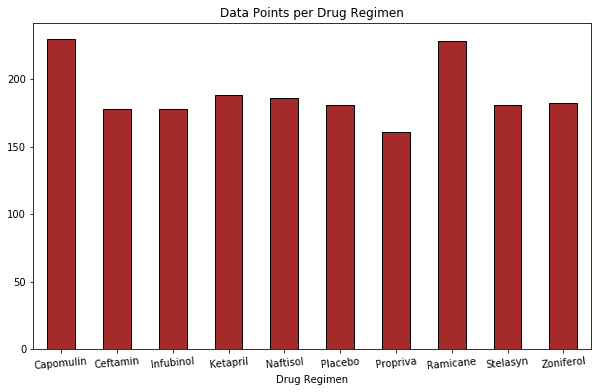

In [4]:
regimen_p = merged.groupby("Drug Regimen")["Drug Regimen"].agg('count')
regimen_p.plot(kind="bar", figsize=(10,6), title="Data Points per Drug Regimen", rot=5, facecolor = 'brown', edgecolor="black")

## 2b Pyplot Method

In [5]:

regimen_p


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Drug Regimen, dtype: int64

In [6]:
values = list(regimen_p)
drugs = regimen_p.keys()
drugs = list(drugs)

print(drugs)
print(values)

['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]


Text(0.5, 1.0, 'Data Points per Drug Regimen')

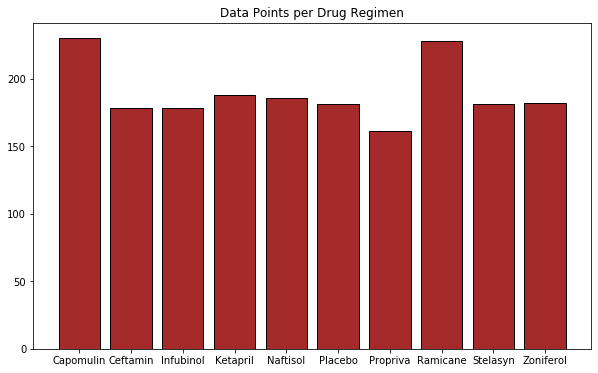

In [7]:
import numpy as np
x_axis = np.arange(len(drugs))
plt.figure(figsize=(10,6))
plt.bar(x_axis, values, color="brown", align="center", edgecolor="black")
plt.xticks(x_axis, drugs)

plt.title("Data Points per Drug Regimen")


##  3. Pie plots

## 3a. Pandas Plot
Generate a pie plot showing the distribution of female versus male mice using pandas

In [8]:
merged_p = merged.groupby("Sex")["Sex"].agg('count')

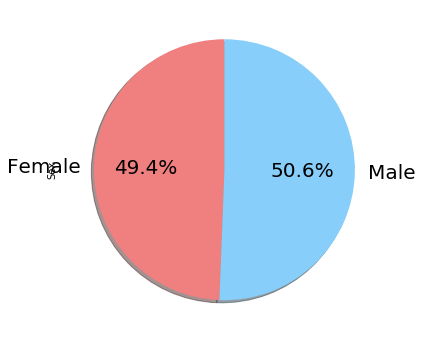

In [9]:
merged_p.plot(kind="pie", startangle=90, figsize=(6,6), fontsize=20, colors=['lightcoral','lightskyblue'], shadow=True, autopct='%.1f%%')

## 3b. Pyplot 
Generate a pie plot showing the distribution of female versus male mice using pyplot

In [10]:
breakdown = list(merged_p)

In [11]:
labels = merged_p.keys()
labels = list(labels)


(-1.105172849624489,
 1.1027130801595115,
 -1.1045613723658971,
 1.1002172082078998)

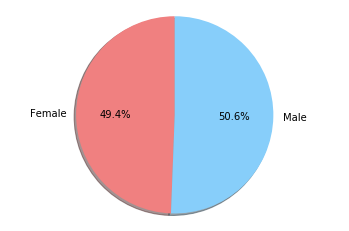

In [12]:
colors = ["lightcoral", "lightskyblue"]
plt.pie(breakdown, labels=labels, startangle=90, shadow=True, colors=colors, autopct="%1.1f%%")
plt.axis("equal")

## 4. & 5  Quartiles, outliers and boxplots
Calculate the final tumor volume of each mouse across four regimens: Capomulin, Ramicane, Infubinol and Ceftamin.
Calculate the quartiles and IQR and quantitavely determine if there are potential outliers across all four
treatment regimens.

In [13]:

capomulin_treated = merged[merged["Drug Regimen"] == "Capomulin"]
ramicane_treated = merged[merged["Drug Regimen"] == "Ramicane"]
infubinol_treated = merged[merged["Drug Regimen"] == "Infubinol"]
ceftamin_treated = merged[merged["Drug Regimen"] == "Ceftamin"]

capo1 = capomulin_treated.groupby(["Mouse ID", "Drug Regimen"])["Timepoint"].agg('max')
rami1 = ramicane_treated.groupby(["Mouse ID", "Drug Regimen"])["Timepoint"].agg('max')
infu1 = infubinol_treated.groupby(["Mouse ID", "Drug Regimen"])["Timepoint"].agg('max')
ceft1 = ceftamin_treated.groupby(["Mouse ID", "Drug Regimen"])["Timepoint"].agg('max')

capfinal = pd.merge(capo1, capomulin_treated, how='inner', left_on=['Mouse ID', 'Timepoint'], right_on=['Mouse ID', 'Timepoint'])
ramifinal = pd.merge(rami1, ramicane_treated, how='inner', left_on=['Mouse ID', 'Timepoint'], right_on=['Mouse ID', 'Timepoint'])
infufinal = pd.merge(infu1, infubinol_treated, how='inner', left_on=['Mouse ID', 'Timepoint'], right_on=['Mouse ID', 'Timepoint'])
ceftfinal = pd.merge(ceft1, ceftamin_treated, how='inner', left_on=['Mouse ID', 'Timepoint'], right_on=['Mouse ID', 'Timepoint'])



## CAPOMULIN 

In [14]:
cap_size = capfinal["Tumor Volume (mm3)"].sort_values(ascending = True)

In [15]:
#cap_size

In [16]:
arr = np.asarray(cap_size)


In [17]:
avg = np.mean(arr)
avg

36.6675677192

In [18]:
mid = np.median(arr)
mid

38.125164399999996

In [19]:
q1 = np.percentile(arr,25)
q3 = np.percentile(arr,75)

In [20]:
print(f"Q1 is {q1}")
print(f"Q3 is {q3}")

Q1 is 32.37735684
Q3 is 40.1592203


In [21]:
iqr = (q3 - q1)
print("interquartile range:", iqr)

interquartile range: 7.781863460000004


In [22]:
lower_boundary = q1 - (1.5 * iqr)
lower_boundary

20.70456164999999

In [23]:
upper_boundary = q3 + (1.5 * iqr)
upper_boundary

51.83201549

In [24]:
arr[arr <= lower_boundary]

array([], dtype=float64)

In [25]:
arr[arr >= upper_boundary]

array([], dtype=float64)

The mean is 36.6675677192
The median is 38.125164399999996
Q1 is 32.37735684
Q3 is 40.1592203
IQR is 7.781863460000004
Quantitatively determine outliers:
lower boundary 20.70456164999999
upper boundary 51.83201549
Beyond upper bound: []
Beyond lower bound: []
-------------------------------------------------------


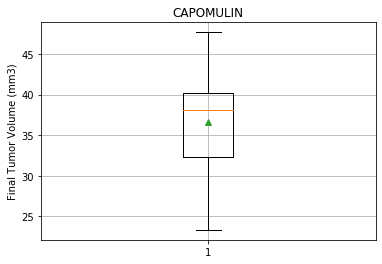

In [26]:
print(f"The mean is {avg}")
print(f"The median is {mid}")
print(f"Q1 is {q1}")
print(f"Q3 is {q3}")
print(f"IQR is {iqr}")
print("Quantitatively determine outliers:")
print(f"lower boundary {lower_boundary}")
print(f"upper boundary {upper_boundary}")
print(f"Beyond upper bound: {arr[arr >= upper_boundary]}")
print(f"Beyond lower bound: {arr[arr <= lower_boundary]}")
print("-" * 55)
plt.boxplot(arr, showmeans=True, sym='b.')
plt.title("CAPOMULIN")
plt.ylabel("Final Tumor Volume (mm3)")
plt.grid()
plt.show()


## RAMICANE

In [27]:
ram_size = ramifinal["Tumor Volume (mm3)"].sort_values(ascending = True)

In [28]:
#ram_size

In [29]:
arr = np.asarray(ram_size)


In [30]:
avg = np.mean(arr)
avg

36.1913904284

In [31]:
mid = np.median(arr)
mid

36.56165229

In [32]:
q1 = np.percentile(arr,25)
q3 = np.percentile(arr,75)

In [33]:
print(f"Q1 is {q1}")
print(f"Q3 is {q3}")

Q1 is 31.56046955
Q3 is 40.65900627


In [34]:
iqr = (q3 - q1)
print('interquartile range:', iqr)

interquartile range: 9.098536719999998


In [35]:
lower_boundary = q1 - (1.5 * iqr)
lower_boundary

17.912664470000003

In [36]:
upper_boundary = q3 + (1.5 * iqr)
upper_boundary

54.30681135

In [37]:
arr[arr <= lower_boundary]

array([], dtype=float64)

In [38]:
arr[arr >= upper_boundary]

array([], dtype=float64)

The mean is 36.1913904284
The median is 36.56165229
Q1 is 31.56046955
Q3 is 40.65900627
IQR is 9.098536719999998
Quantitatively determine outliers:
lower boundary 17.912664470000003
upper boundary 54.30681135
Beyond upper bound: []
Beyond lower bound: []
-------------------------------------------------------


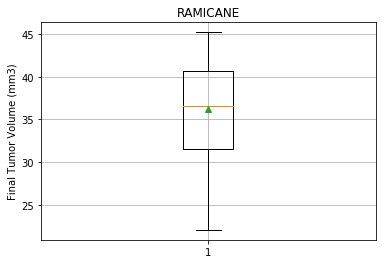

In [39]:
print(f"The mean is {avg}")
print(f"The median is {mid}")
print(f"Q1 is {q1}")
print(f"Q3 is {q3}")
print(f"IQR is {iqr}")
print("Quantitatively determine outliers:")
print(f"lower boundary {lower_boundary}")
print(f"upper boundary {upper_boundary}")
print(f"Beyond upper bound: {arr[arr >= upper_boundary]}")
print(f"Beyond lower bound: {arr[arr <= lower_boundary]}")
print("-" * 55)
plt.boxplot(arr, showmeans=True, sym='b.')
plt.title("RAMICANE")
plt.ylabel("Final Tumor Volume (mm3)")
plt.grid()
plt.show()

## INFUBINOL

In [40]:
inf_size = infufinal["Tumor Volume (mm3)"].sort_values(ascending = True)

In [41]:
#inf_size

In [42]:
arr = np.asarray(inf_size)

In [43]:
avg = np.mean(arr)
avg

58.1782457852

In [44]:
mid=np.median(arr)
mid

60.16518046

In [45]:
q1 = np.percentile(arr, 25)
q3 = np.percentile(arr,75)

In [46]:
print(f"Q1 is {q1}")
print(f"Q3 is {q3}")

Q1 is 54.04860769
Q3 is 65.52574285


In [47]:
iqr=(q3-q1)
print("interquartile range:", iqr)

interquartile range: 11.477135160000003


In [48]:
lower_boundary = q1 - (1.5 * iqr)
lower_boundary

36.83290494999999

In [49]:
upper_boundary = q3 + (1.5 * iqr)
upper_boundary

82.74144559000001

In [50]:
arr[arr <= lower_boundary]

array([36.3213458])

In [51]:
arr[arr >= upper_boundary]

array([], dtype=float64)

The mean is 58.1782457852
The median is 60.16518046
Q1 is 54.04860769
Q3 is 65.52574285
IQR is 11.477135160000003
Quantitatively determine outliers:
lower boundary 36.83290494999999
upper boundary 82.74144559000001
Beyond upper bound: []
Beyond lower bound: [36.3213458]
-------------------------------------------------------


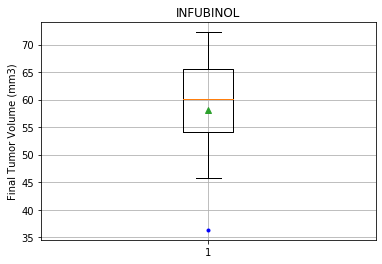

In [52]:
print(f"The mean is {avg}")
print(f"The median is {mid}")
print(f"Q1 is {q1}")
print(f"Q3 is {q3}")
print(f"IQR is {iqr}")
print("Quantitatively determine outliers:")
print(f"lower boundary {lower_boundary}")
print(f"upper boundary {upper_boundary}")
print(f"Beyond upper bound: {arr[arr >= upper_boundary]}")
print(f"Beyond lower bound: {arr[arr <= lower_boundary]}")
print("-" * 55)
plt.boxplot(arr, showmeans=True, sym='b.')
plt.title("INFUBINOL")
plt.ylabel("Final Tumor Volume (mm3)")
plt.grid()
plt.show()

## CEFTAMIN

In [53]:
cef_size = ceftfinal["Tumor Volume (mm3)"].sort_values(ascending = True)

In [54]:
#cef_size

In [55]:
arr = np.asarray(cef_size)

In [56]:
avg = np.mean(arr)
avg

57.753976825200006

In [57]:
mid = np.median(arr)
mid

59.85195552

In [58]:
q1 = np.percentile(arr,25)
q3 = np.percentile(arr,75)

In [59]:
print(f"Q1 is {q1}")
print(f"Q3 is {q3}")

Q1 is 48.72207785
Q3 is 64.29983003


In [60]:
iqr = (q3-q1)
print("interquartile range:", iqr)

interquartile range: 15.577752179999997


In [61]:
lower_boundary = q1 - ( 1.5 * iqr)
lower_boundary

25.355449580000002

In [62]:
upper_boundary = q3 + ( 1.5 * iqr)
upper_boundary

87.66645829999999

In [63]:
arr[arr >= upper_boundary]

array([], dtype=float64)

In [64]:
arr[arr <= lower_boundary]

array([], dtype=float64)

The mean is 57.753976825200006
The median is 59.85195552
Q1 is 48.72207785
Q3 is 64.29983003
IQR is 15.577752179999997
Quantitatively determine outliers:
lower boundary 25.355449580000002
upper boundary 87.66645829999999
Beyond upper bound: []
Beyond lower bound: []
-------------------------------------------------------


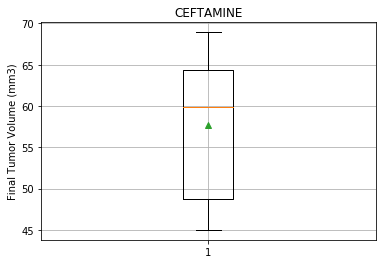

In [65]:
print(f"The mean is {avg}")
print(f"The median is {mid}")
print(f"Q1 is {q1}")
print(f"Q3 is {q3}")
print(f"IQR is {iqr}")
print("Quantitatively determine outliers:")
print(f"lower boundary {lower_boundary}")
print(f"upper boundary {upper_boundary}")
print(f"Beyond upper bound: {arr[arr <= lower_boundary]}")
print(f"Beyond lower bound: {arr[arr >= upper_boundary]}")
print("-" * 55)
plt.boxplot(arr, showmeans=True, sym='b.')
plt.title("CEFTAMINE")
plt.ylabel("Final Tumor Volume (mm3)")
plt.grid()
plt.show()

## All four box plots in same figure

[Text(0, 0, 'CEFTAMINE'),
 Text(0, 0, 'INFUBINOL'),
 Text(0, 0, 'RAMICANE'),
 Text(0, 0, 'CAPOMULIN')]

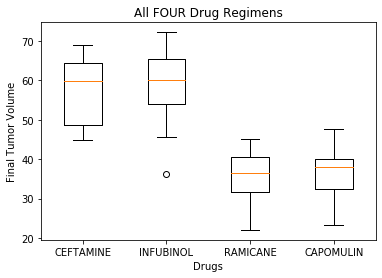

In [66]:
arr_01 = np.asarray(cef_size)
arr_02 = np.asarray(inf_size)
arr_03 = np.asarray(ram_size)
arr_04 = np.asarray(cap_size)

my_dict = {'CEFTAMINE': arr_01, 'INFUBINOL': arr_02, 'RAMICANE' : arr_03, 'CAPOMULIN' : arr_04}

fig, ax = plt.subplots()
ax.boxplot(my_dict.values())
ax.set_title("All FOUR Drug Regimens")
ax.set_xlabel("Drugs")
ax.set_ylabel("Final Tumor Volume")
ax.set_xticklabels(my_dict.keys())



## 7. Line plot of time point versus tumor volume for a single mouse treated with Capomulin.

In [67]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

Text(0, 0.5, 'Tumor Volume mm3')

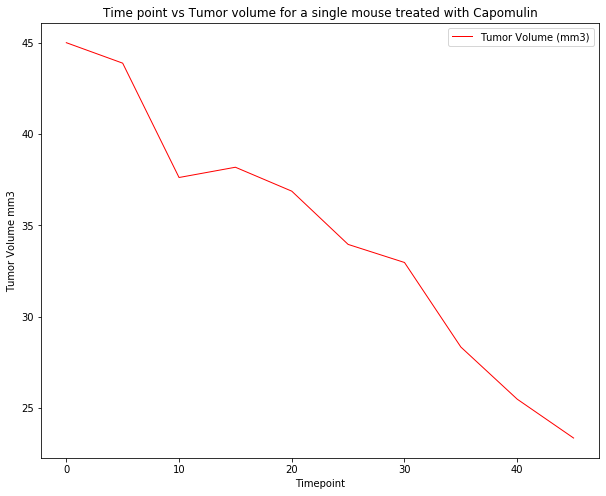

In [68]:
mouse = merged[merged["Mouse ID"] == "s185"]
mouse = mouse[['Timepoint', 'Tumor Volume (mm3)']]
mouse.reset_index(inplace=True)
mouse.set_index("Timepoint", inplace=True)
del mouse["index"]
ax = mouse.plot(kind='line', figsize=(10,8), linewidth=1, color='r', title="Time point vs Tumor volume for a single mouse treated with Capomulin")
ax.set_xlabel("Timepoint")
ax.set_ylabel("Tumor Volume mm3")





## 8. Scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [69]:
mouse2 = merged[merged["Drug Regimen"] == "Capomulin"]
mouse2.columns
mouse2.reset_index(inplace = True)
mouse2.set_index("Mouse ID", inplace=True)
del mouse2['index']
#mouse2

In [70]:
m2_gp = mouse2.groupby(["Mouse ID"])

In [71]:
m2_avg = m2_gp[["Weight (g)", "Tumor Volume (mm3)"]].mean()
#print(m2_avg)

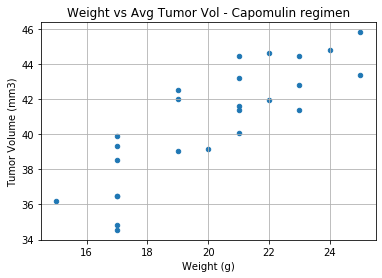

In [72]:
m2_avg.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, title="Weight vs Avg Tumor Vol - Capomulin regimen")



## 9. Correlation Coefficient and Linear Regression Model

In [73]:
weight = m2_avg["Weight (g)"]
tumor_vol = m2_avg["Tumor Volume (mm3)"]
correlation = st.pearsonr(weight,tumor_vol)
print(f"The correlation between both factors is {round(correlation[0],2)}")

#strong correlatoin between weight and tumor voulme. 


The correlation between both factors is 0.84


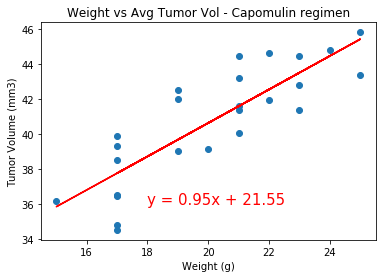

In [74]:
x_values =  m2_avg["Weight (g)"]
y_values = m2_avg["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (18,36),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.title("Weight vs Avg Tumor Vol - Capomulin regimen")
plt.ylabel('Tumor Volume (mm3)')
plt.show()